[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/plot_api_example.ipynb)

In [1]:
# Colab environment requires 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pycirclize 

## 1. Circos Class Plot

### 1-1. axis

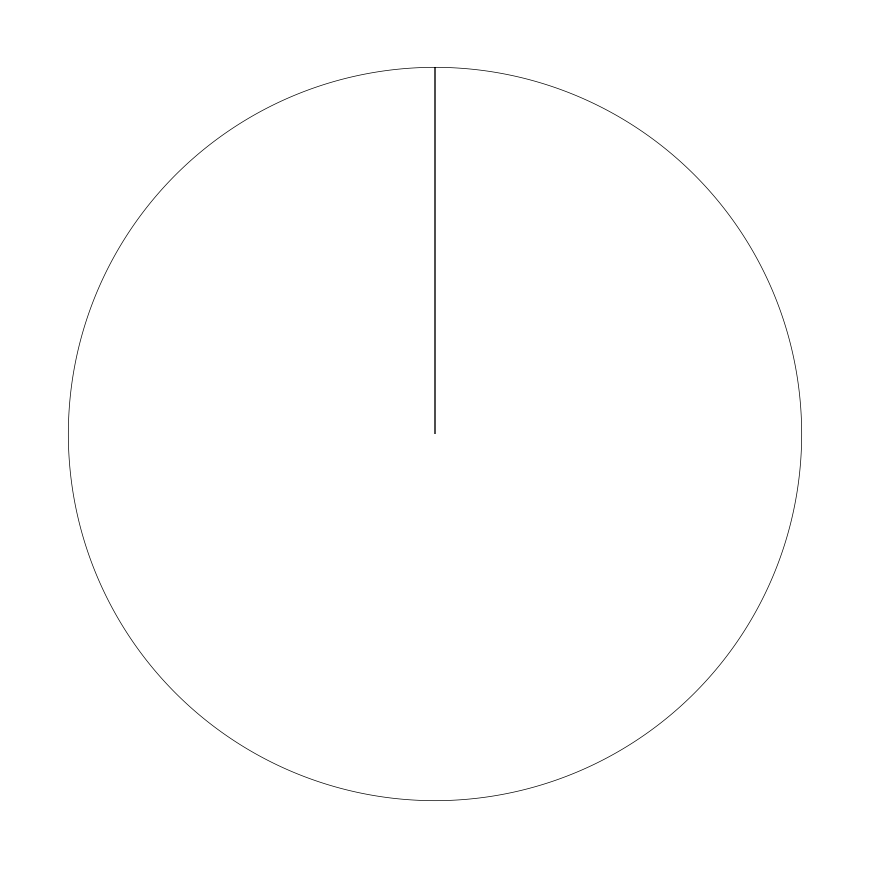

In [2]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
circos.axis()
fig = circos.plotfig()

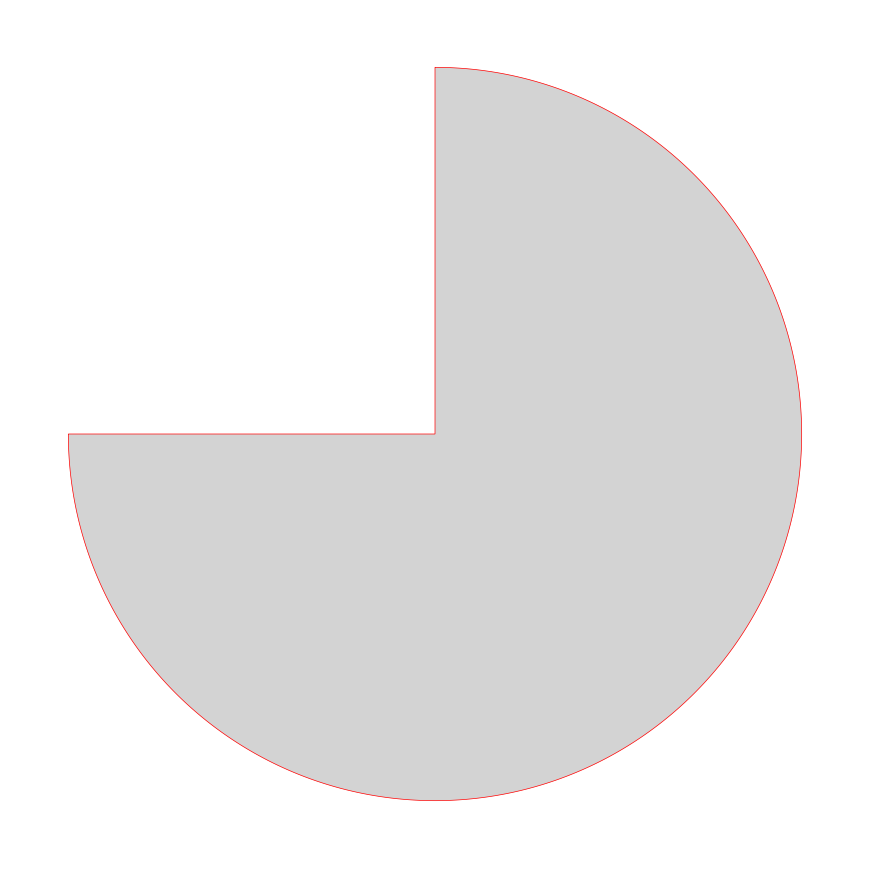

In [3]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, end=270, space=5)
circos.axis(fc="lightgrey", ec="red")
fig = circos.plotfig()

### 1-2. text

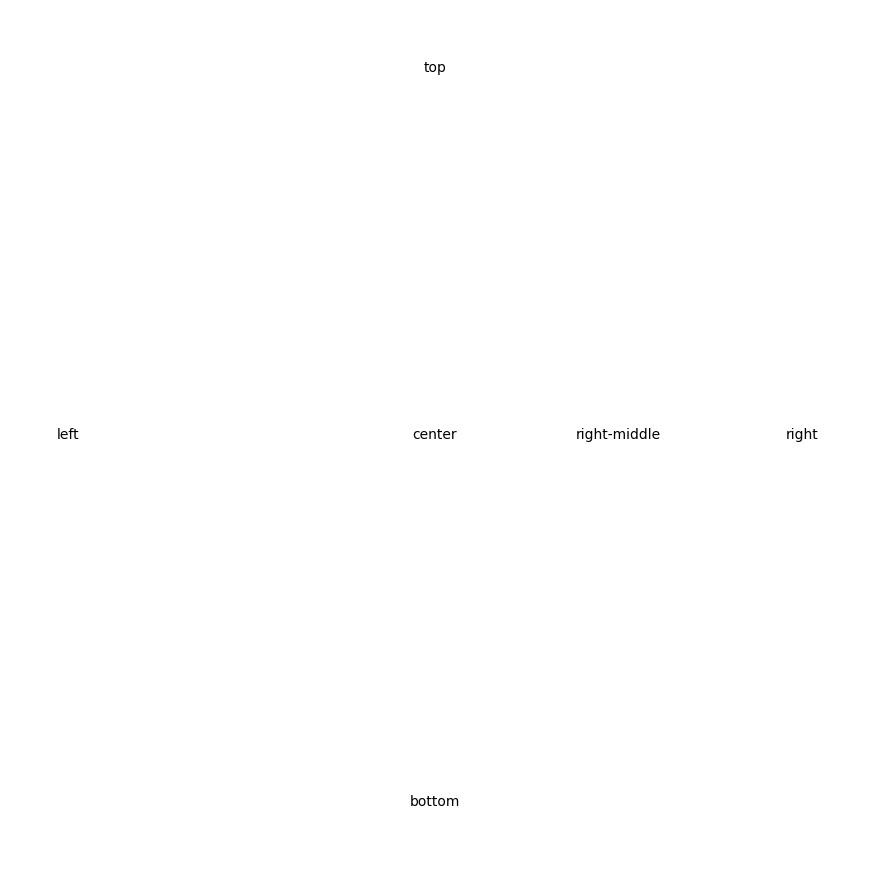

In [4]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
circos.text("center")
circos.text("top", r=100)
circos.text("right", r=100, deg=90)
circos.text("right-middle", r=50, deg=90)
circos.text("bottom", r=100, deg=180)
circos.text("left", r=100, deg=270)
fig = circos.plotfig()

### 1-3. line

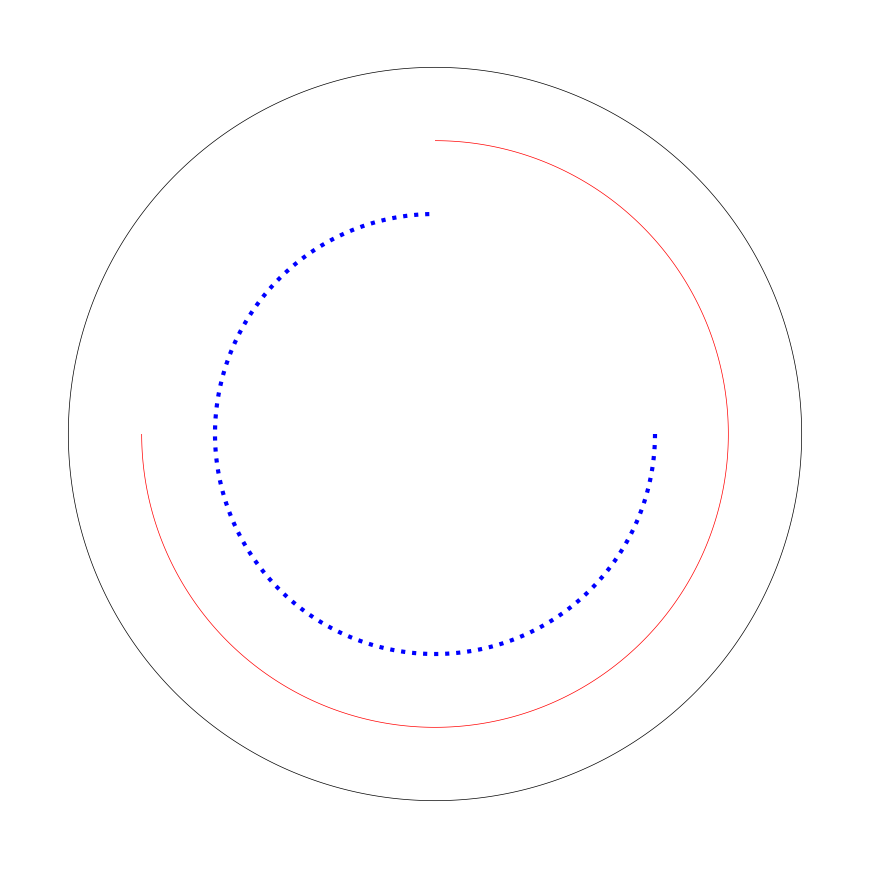

In [5]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
circos.line(r=100)
circos.line(r=80, deg_lim=(0, 270), color="red")
circos.line(r=60, deg_lim=(90, 360), color="blue", lw=3, ls="dotted")
fig = circos.plotfig()

### 1-4. rect

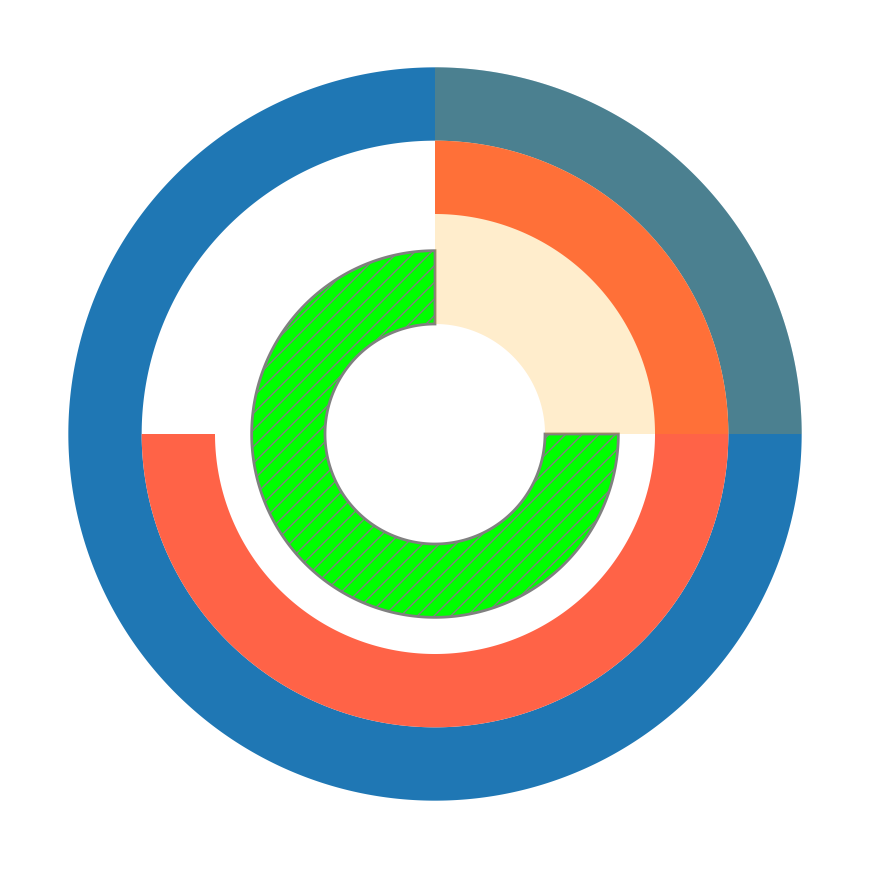

In [6]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
circos.rect(r_lim=(80, 100))
circos.rect(r_lim=(60, 80), deg_lim=(0, 270), fc="tomato")
circos.rect(r_lim=(30, 50), deg_lim=(90, 360), fc="lime", ec="grey", lw=2, hatch="//")
circos.rect(r_lim=(30, 100), deg_lim=(0, 90), fc="orange", alpha=0.2)
fig = circos.plotfig()

### 1-5. link

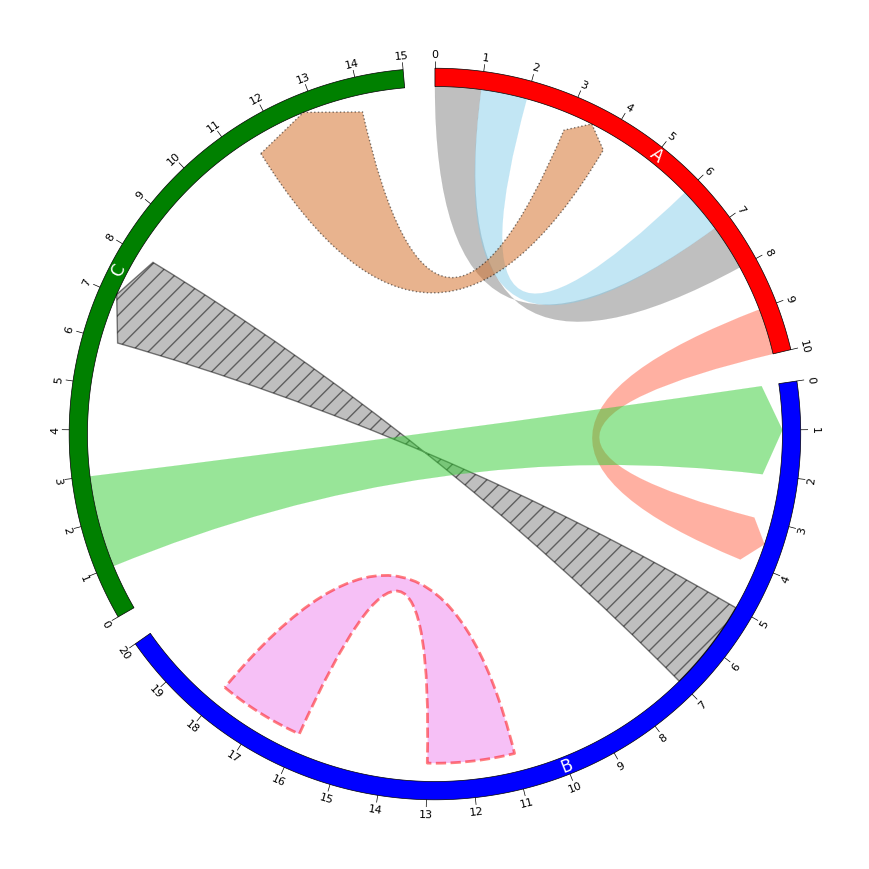

In [7]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
name2color = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track = sector.add_track((95, 100))
    track.axis(fc=name2color[sector.name])
    track.text(sector.name, color="white", size=12)
    track.xticks_by_interval(1)

# Plot links in various styles
circos.link(("A", 0, 1), ("A", 7, 8))
circos.link(("A", 1, 2), ("A", 7, 6), color="skyblue")
circos.link(("A", 9, 10), ("B", 4, 3), direction=1, color="tomato")
circos.link(("B", 5, 7), ("C", 6, 8), direction=1, ec="black", lw=1, hatch="//")
circos.link(("B", 18, 16), ("B", 11, 13), r1=90, r2=90, color="violet", ec="red", lw=2, ls="dashed")
circos.link(("C", 1, 3), ("B", 2, 0), direction=1, color="limegreen")
circos.link(("C", 11.5, 14), ("A", 4, 3), direction=2, color="chocolate", ec="black", lw=1, ls="dotted")

fig = circos.plotfig()

## 2. Sector Class Plot

### 2-1. axis

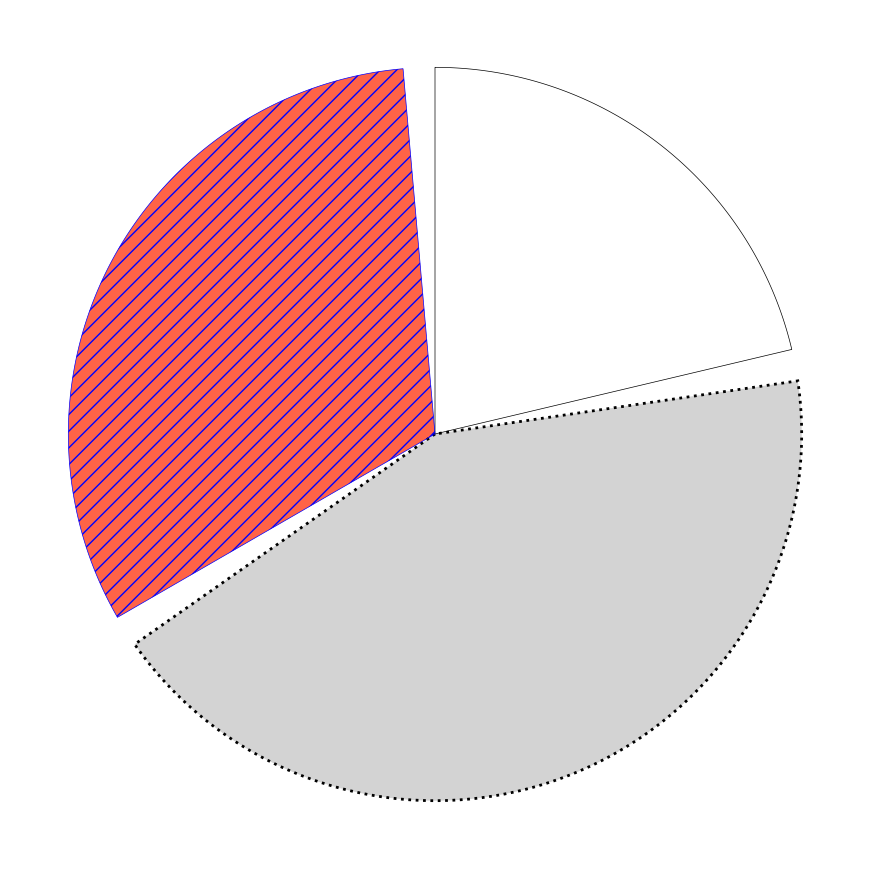

In [8]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
sector_a = circos.get_sector("A")
sector_a.axis()
sector_b = circos.get_sector("B")
sector_b.axis(fc="lightgrey", lw=2, ls="dotted")
sector_c = circos.get_sector("C")
sector_c.axis(fc="tomato", ec="blue", hatch="//")
fig = circos.plotfig()

### 2-2. text

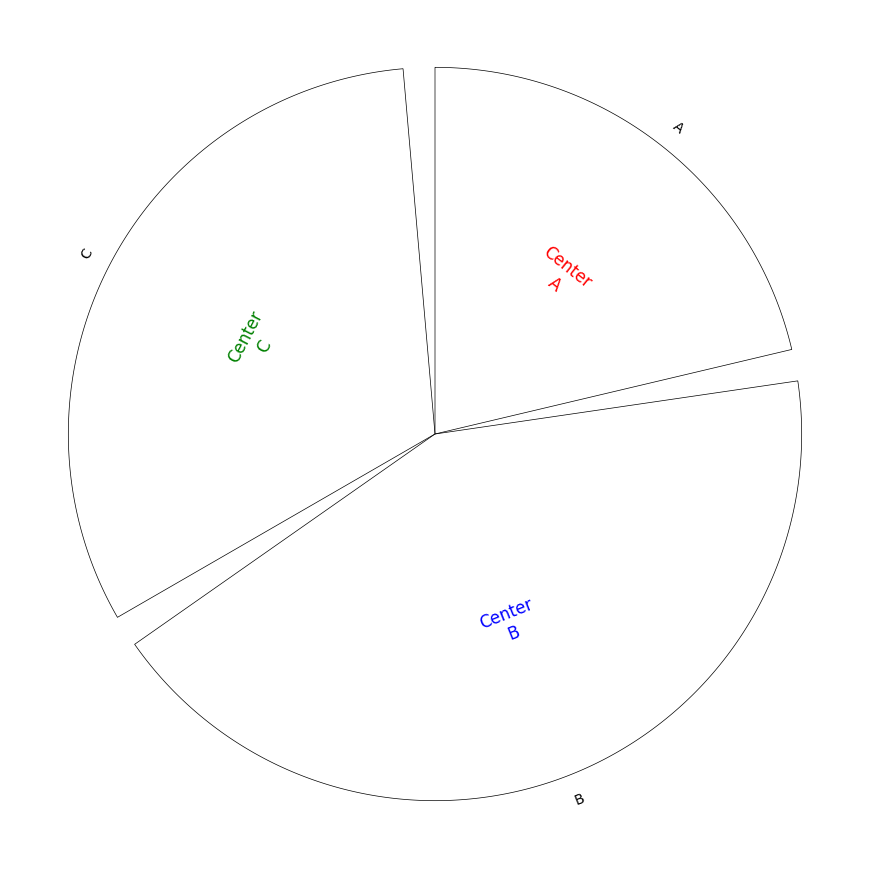

In [9]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
name2color = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    sector.axis()
    sector.text(sector.name)
    sector.text(f"Center\n{sector.name}", r=50, size=12, color=name2color[sector.name])
fig = circos.plotfig()

### 2-3. line

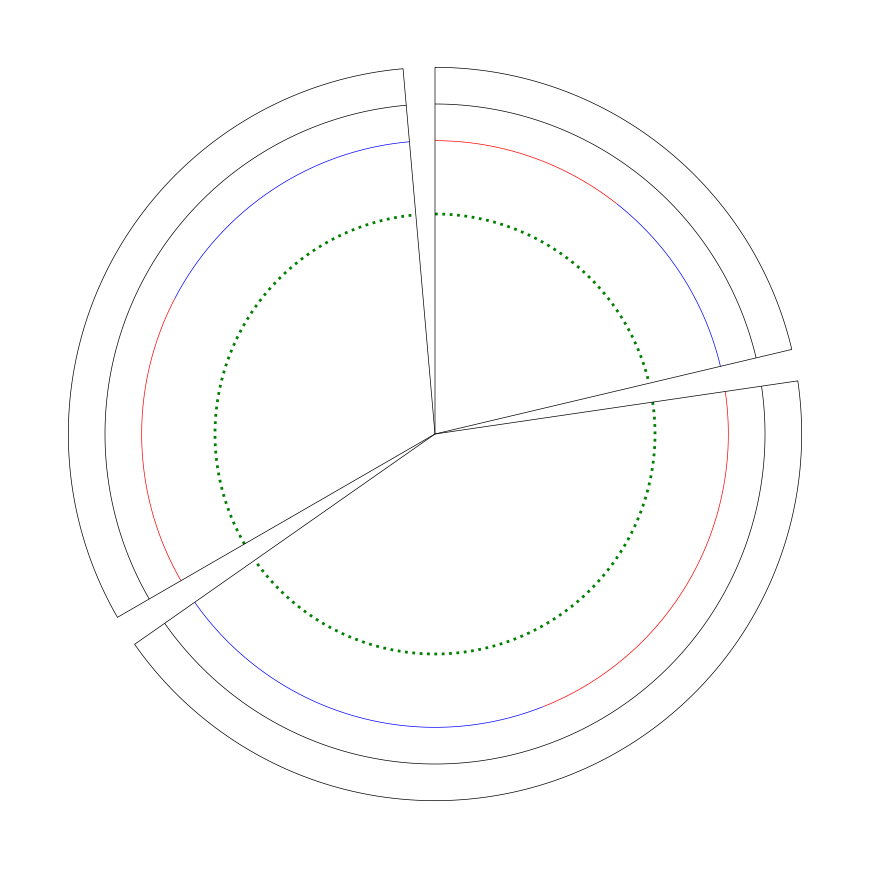

In [10]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    sector.axis()
    sector.line(r=90)
    sector_center = (sector.start + sector.end) / 2
    sector.line(r=80, end=sector_center, color="red")
    sector.line(r=80, start=sector_center, color="blue")
    sector.line(r=60, color="green", lw=2, ls="dotted")
fig = circos.plotfig()

### 2-4. rect

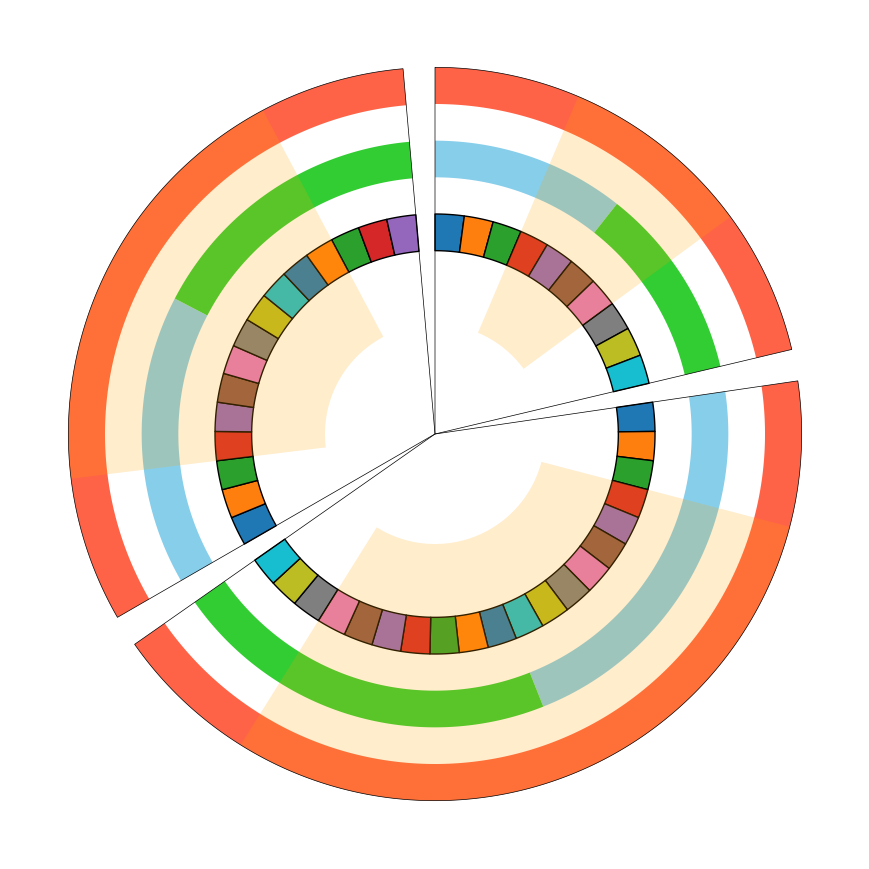

In [11]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler

ColorCycler.set_cmap("tab10")

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    sector.axis()
    sector.rect(r_lim=(90, 100), fc="tomato")
    sector_center = (sector.start + sector.end) / 2
    sector.rect(end=sector_center, r_lim=(70, 80), color="skyblue")
    sector.rect(start=sector_center, r_lim=(70, 80), color="limegreen")
    for i in range(int(sector.size)):
        sector.rect(start=i, end=i + 1, r_lim=(50, 60), fc=ColorCycler(), ec="black", lw=1)
    sector.rect(sector.start + 3, sector.end - 3, r_lim=(30, 100), color="orange", alpha=0.2)
fig = circos.plotfig()

### 2-5. raster

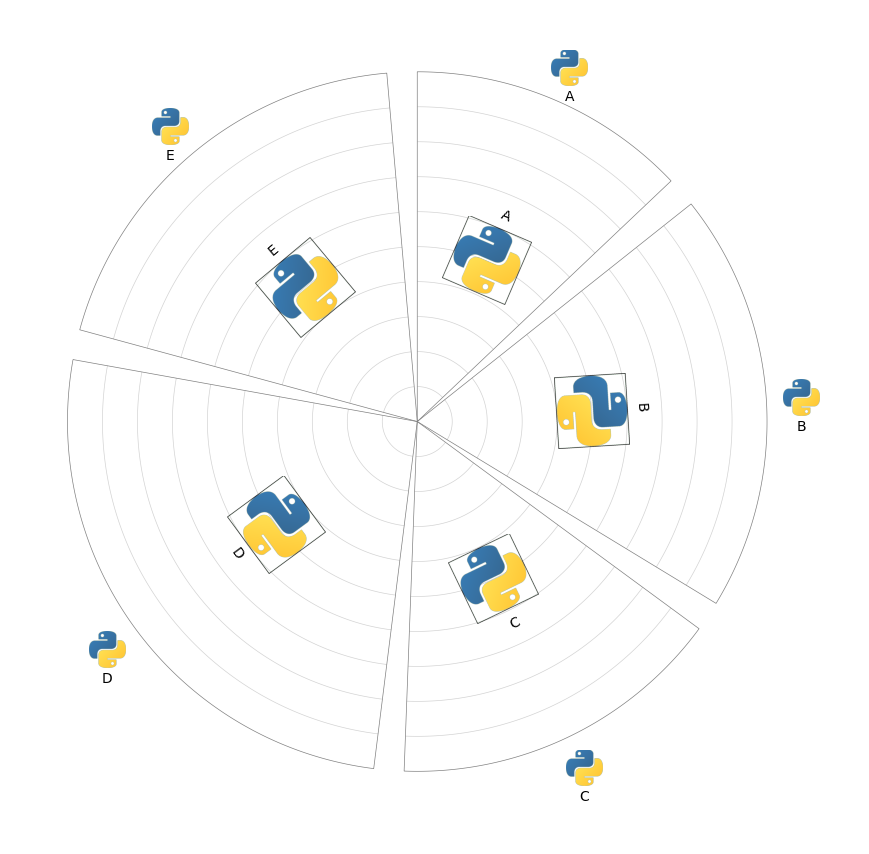

In [1]:
from pycirclize import Circos
from pycirclize.utils import load_example_image_file

sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    # Plot line in sector region
    sector.axis(ec="grey")
    for r in range(10, 100, 10):
        sector.line(r=r, ec="lightgrey")
    # Plot raster image (python logo)
    logo_file = load_example_image_file("python_logo.png")
    sector.raster(logo_file, r=110, label=sector.name)
    sector.raster(logo_file, r=50, size=0.1, rotation="auto", border_width=5)
    sector.text(sector.name, r=62)
fig = circos.plotfig()

## 3. Track Class Plot

### 3-1. axis

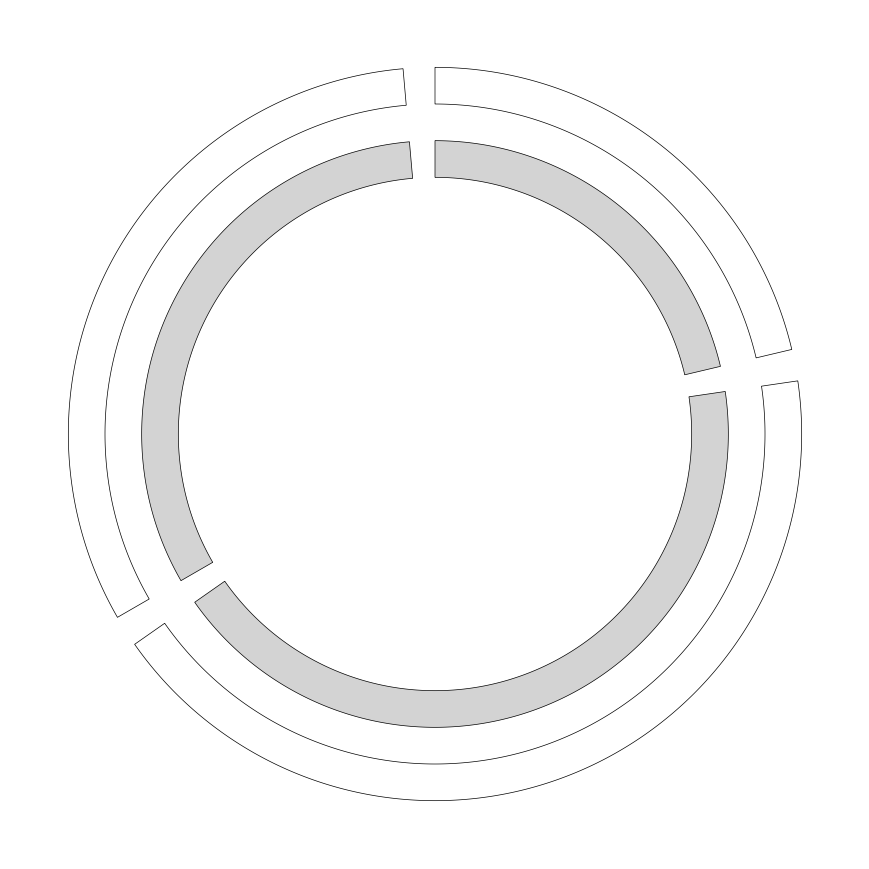

In [12]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track1 = sector.add_track((90, 100))
    track1.axis()
    track2 = sector.add_track((70, 80))
    track2.axis(fc="lightgrey")
fig = circos.plotfig()

### 3-2. text

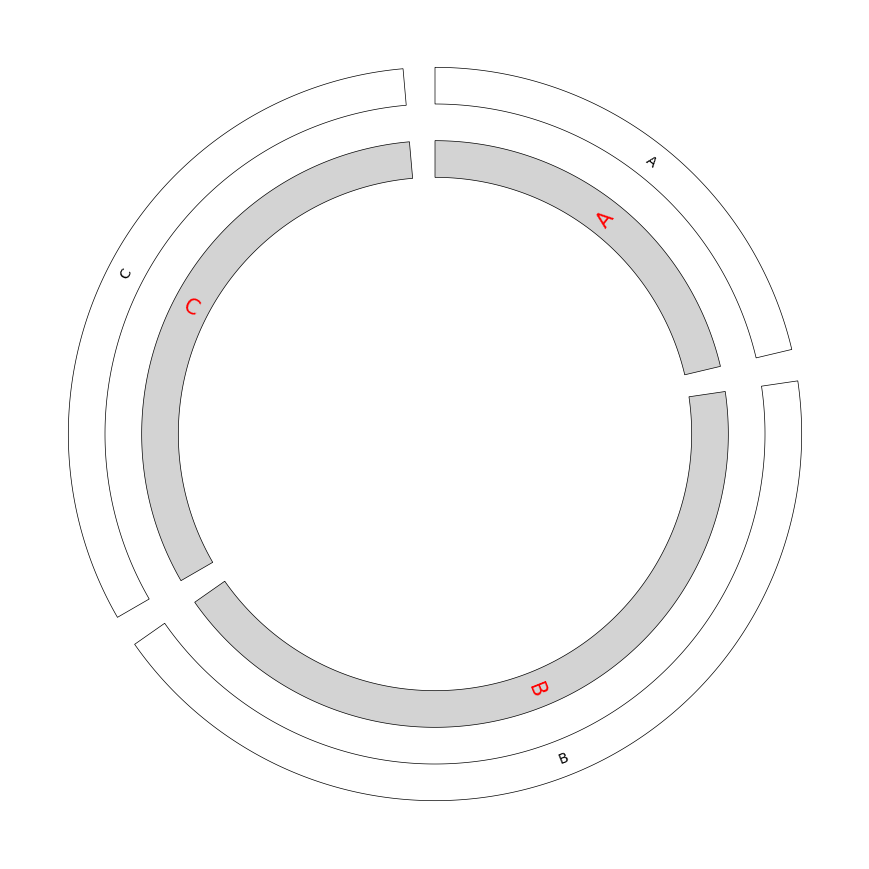

In [13]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track1 = sector.add_track((90, 100))
    track1.axis()
    track1.text(sector.name)
    track2 = sector.add_track((70, 80))
    track2.axis(fc="lightgrey")
    track2.text(sector.name, orientation="vertical", color="red", size=15)
fig = circos.plotfig()

### 3-3. rect

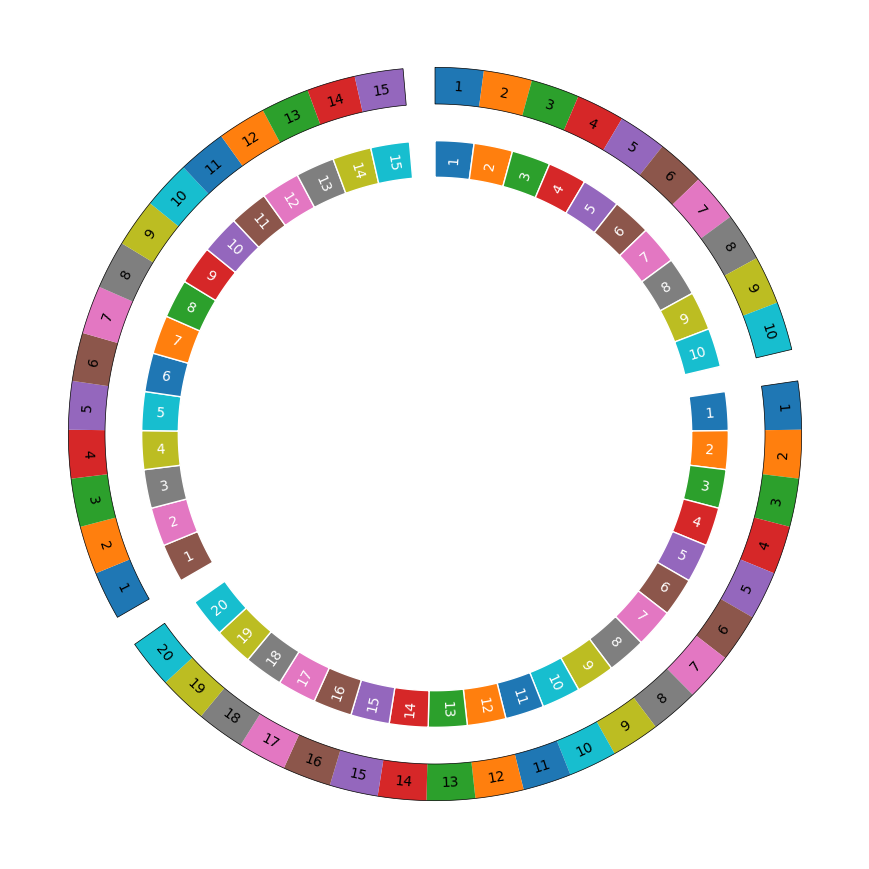

In [14]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
ColorCycler.set_cmap("tab10")

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track1 = sector.add_track((90, 100))
    track1.axis()
    # Plot rect & text (style1)
    for i in range(int(track1.size)):
        start, end = i, i + 1
        track1.rect(start, end, fc=ColorCycler())
        track1.text(str(end), (end + start) / 2)
    # Plot rect & text (style2)
    track2 = sector.add_track((70, 80))
    for i in range(int(track2.size)):
        start, end = i, i + 1
        track2.rect(start, end, fc=ColorCycler(), ec="white", lw=1)
        track2.text(str(end), (end + start) / 2, color="white", orientation="vertical")

fig = circos.plotfig()

### 3-4. arrow

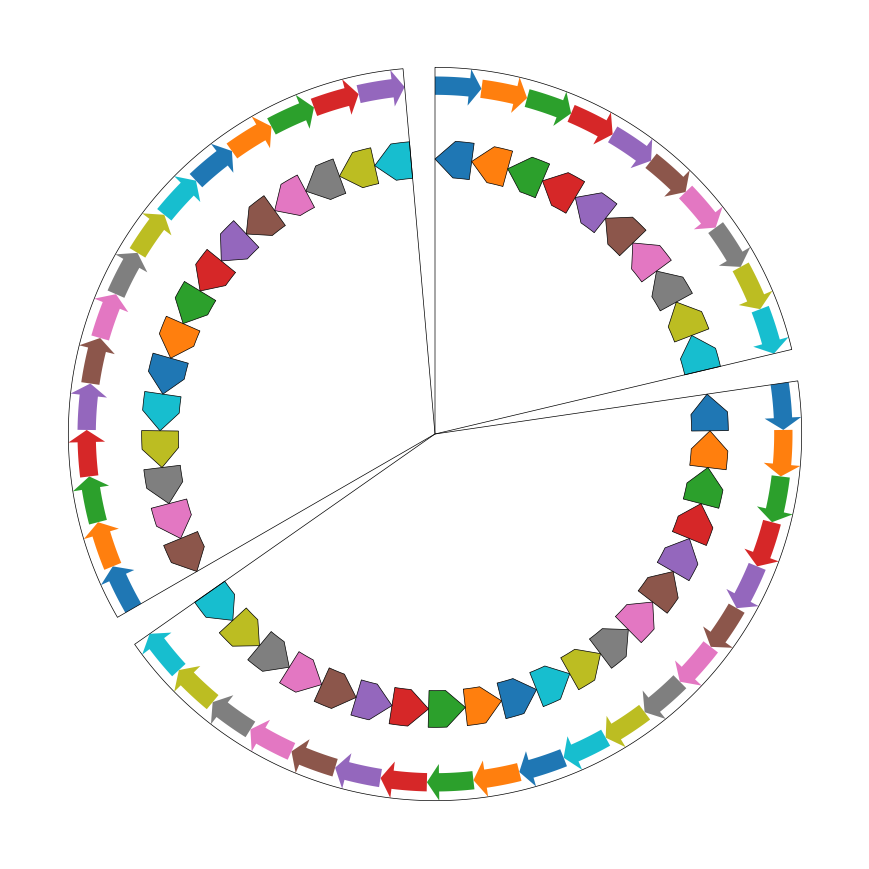

In [15]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler

ColorCycler.set_cmap("tab10")

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    sector.axis()
    # Plot forward arrow with default style
    track1 = sector.add_track((90, 100))
    for i in range(int(track1.size)):
        start, end = i, i + 1
        track1.arrow(start, end, fc=ColorCycler())
    # Plot reverse arrow with user-specified style
    track2 = sector.add_track((70, 80))
    for i in range(int(track2.size)):
        start, end = i, i + 1
        track2.arrow(end, start, head_length=4, shaft_ratio=1.0, fc=ColorCycler(), ec="black", lw=0.5)

fig = circos.plotfig()

### 3-5. xticks

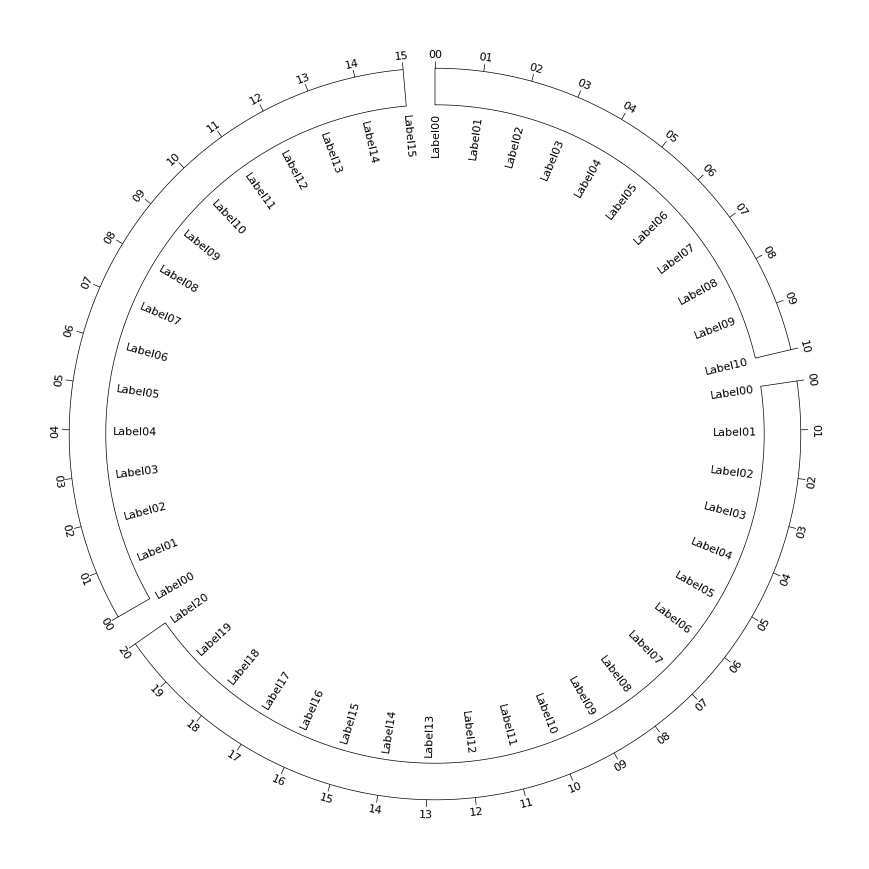

In [16]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track1 = sector.add_track((90, 100))
    track1.axis()
    # Plot outer xticks
    pos_list = list(range(0, int(track1.size) + 1))
    labels = [f"{i:02d}" for i in pos_list]
    track1.xticks(pos_list, labels)
    # Plot inner xticks label
    labels = [f"Label{i:02d}" for i in pos_list]
    track1.xticks(
        pos_list,
        labels,
        outer=False,
        tick_length=0,
        label_margin=2,
        label_orientation="vertical",
    )
fig = circos.plotfig()


### 3-6. xticks_by_interval

#### 3-6-1. Small interval

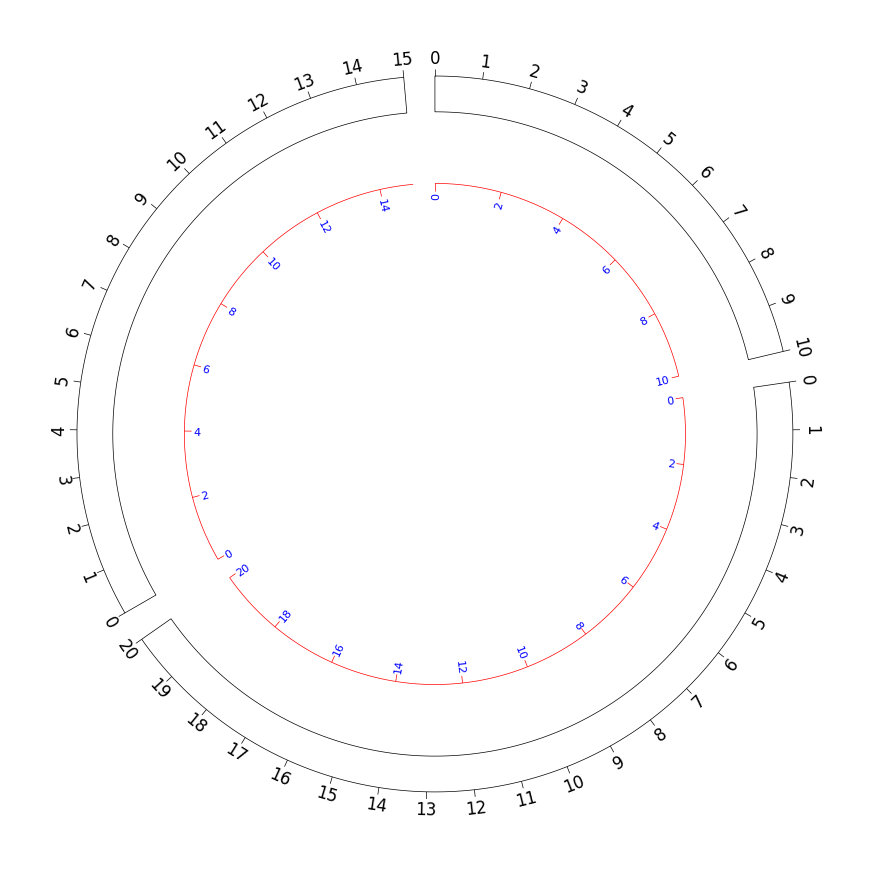

In [17]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    # Plot outer xticks
    track1 = sector.add_track((90, 100))
    track1.axis()
    track1.xticks_by_interval(1, label_size=12)
    # Plot inner xticks
    track2 = sector.add_track((70, 80))
    track2.xticks_by_interval(
        2,
        outer=False,
        show_bottom_line=True,
        label_orientation="vertical",
        line_kws=dict(color="red"),
        text_kws=dict(color="blue"),
    )
fig = circos.plotfig()

#### 3-6-2. Large interval

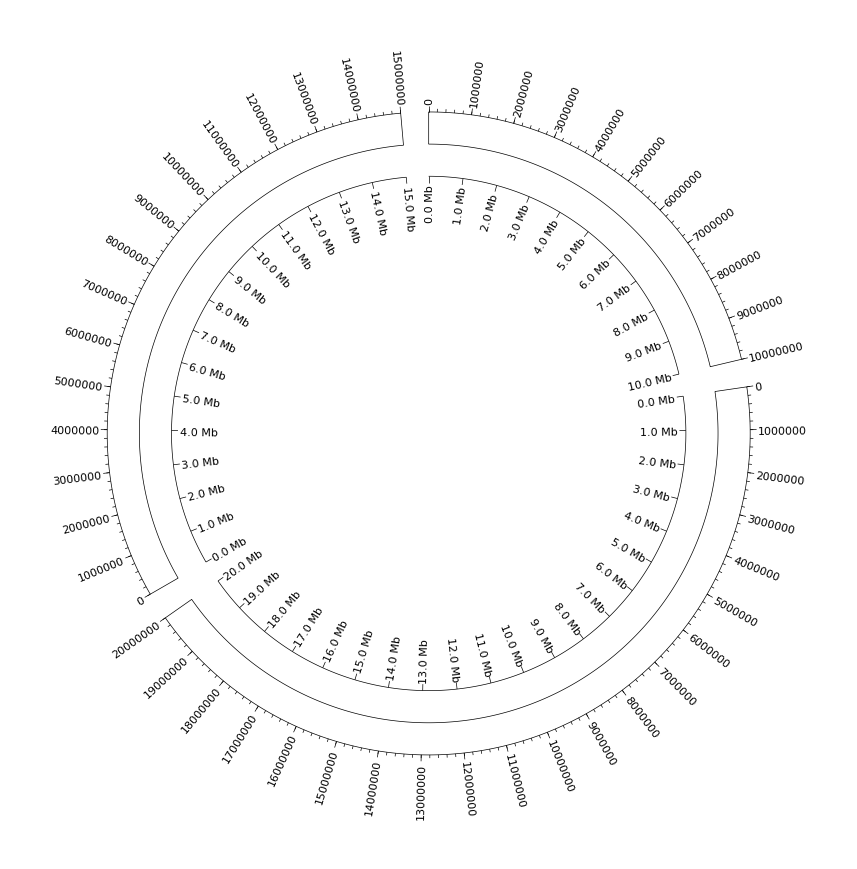

In [18]:
from pycirclize import Circos

sectors = {"A": 10000000, "B": 20000000, "C": 15000000}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    # Major & Minor xticks
    track1 = sector.add_track((90, 100))
    track1.axis()
    mb_size = 1000000
    track1.xticks_by_interval(mb_size, label_orientation="vertical")
    track1.xticks_by_interval(mb_size / 5, tick_length=1, show_label=False)
    # Mb formatted xticks
    track2 = sector.add_track((80, 90))
    track2.xticks_by_interval(
        mb_size,
        outer=False,
        show_bottom_line=True,
        label_orientation="vertical",
        label_formatter=lambda v: f"{v / mb_size:.1f} Mb",
    )
fig = circos.plotfig()


### 3-7. yticks

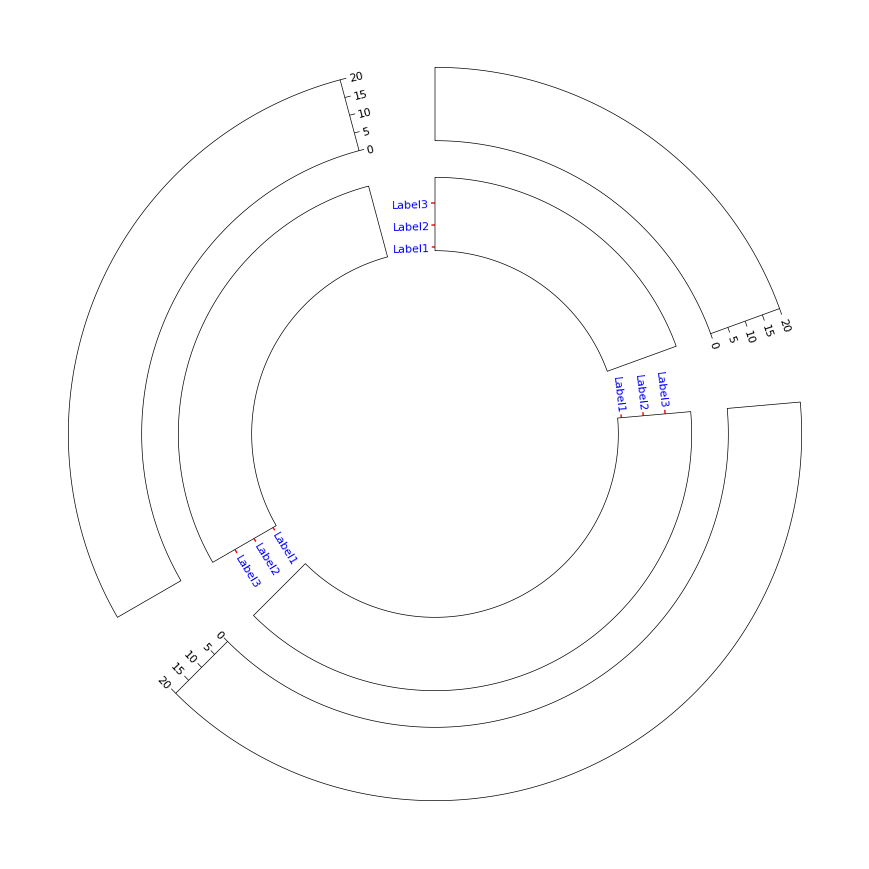

In [28]:
from pycirclize import Circos

sectors = {"A": 10000000, "B": 20000000, "C": 15000000}
circos = Circos(sectors, space=15)
for sector in circos.sectors:
    # Plot yticks
    track1 = sector.add_track((80, 100))
    track1.axis()
    y = [0, 5, 10, 15, 20]
    y_labels = list(map(str, y))
    track1.yticks(y, y_labels)
    # Plot yticks label on left side
    track2 = sector.add_track((50, 70), r_pad_ratio=0.1)
    track2.axis()
    y = [10, 15, 20]
    y_labels = ["Label1", "Label2", "Label3"]
    track2.yticks(y, y_labels, vmin=10, vmax=25, side="left", line_kws=dict(color="red", lw=1), text_kws=dict(color="blue"))

fig = circos.plotfig()

### 3-8. line

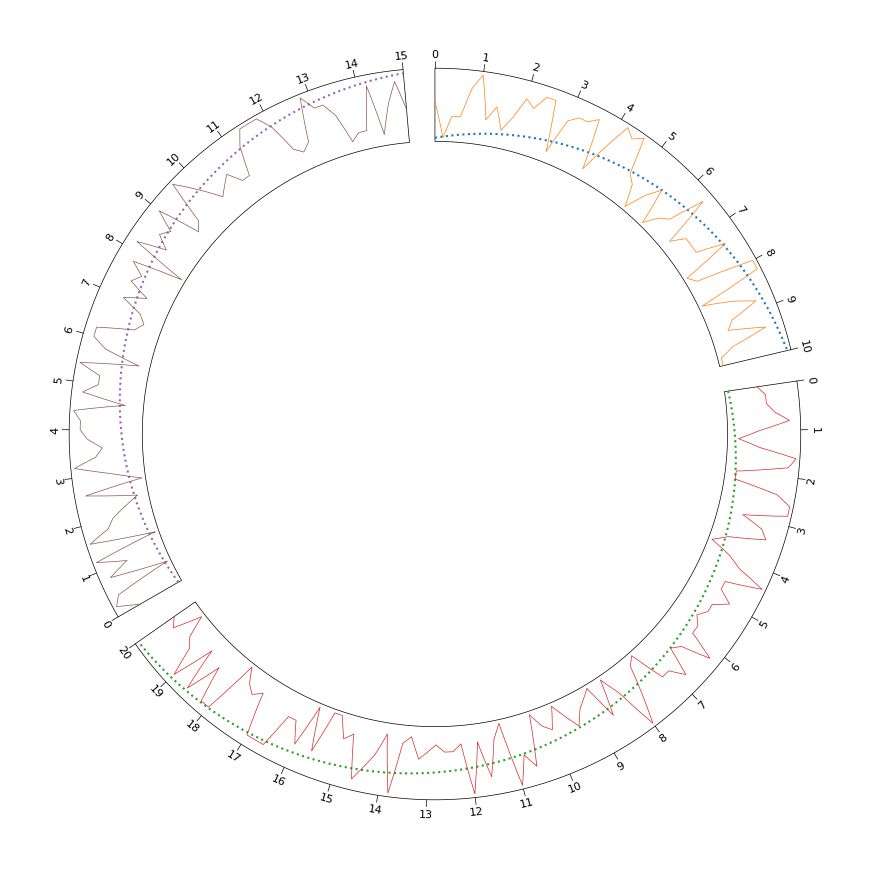

In [20]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track = sector.add_track((80, 100), r_pad_ratio=0.1)
    track.axis()
    track.xticks_by_interval(1)
    vmin, vmax = 0, 10
    # Line between start-end two points
    track.line([track.start, track.end], [vmin, vmax], lw=1.5, ls="dotted")
    # Line of random value points
    x = np.linspace(track.start, track.end, int(track.size) * 5 + 1)
    y = np.random.randint(vmin, vmax, len(x))
    track.line(x, y)
fig = circos.plotfig()

### 3-9. scatter

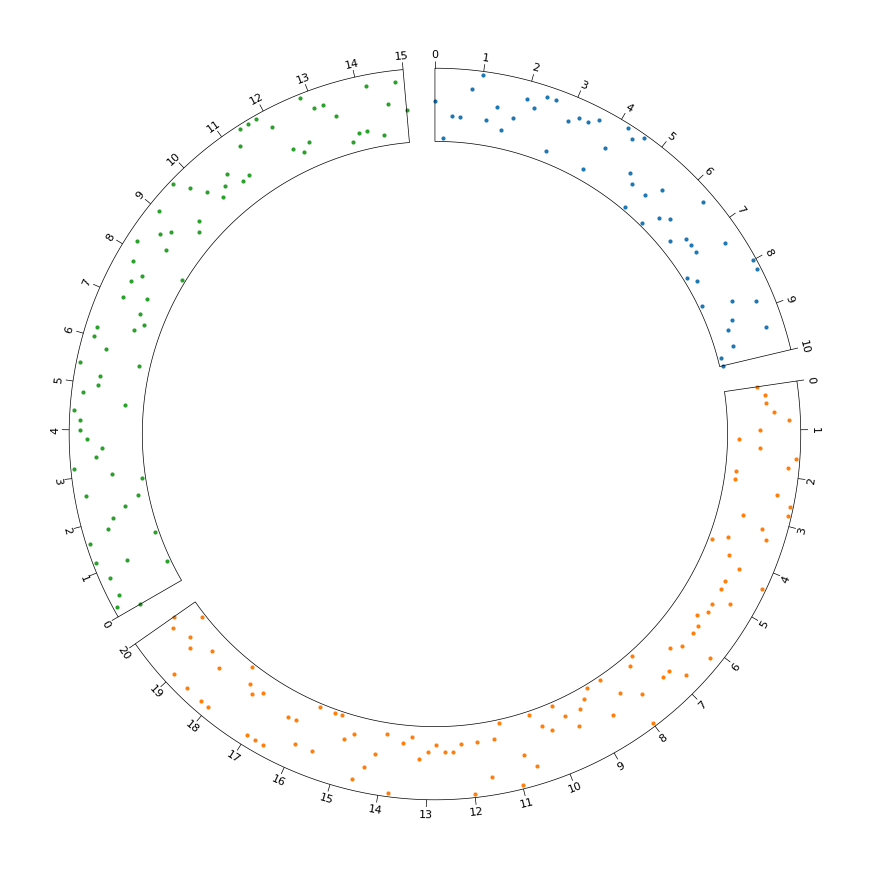

In [21]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track = sector.add_track((80, 100), r_pad_ratio=0.1)
    track.axis()
    track.xticks_by_interval(1)
    vmin, vmax = 0, 10
    x = np.linspace(track.start, track.end, int(track.size) * 5 + 1)
    y = np.random.randint(vmin, vmax, len(x))
    track.scatter(x, y)
fig = circos.plotfig()

### 3-10. bar

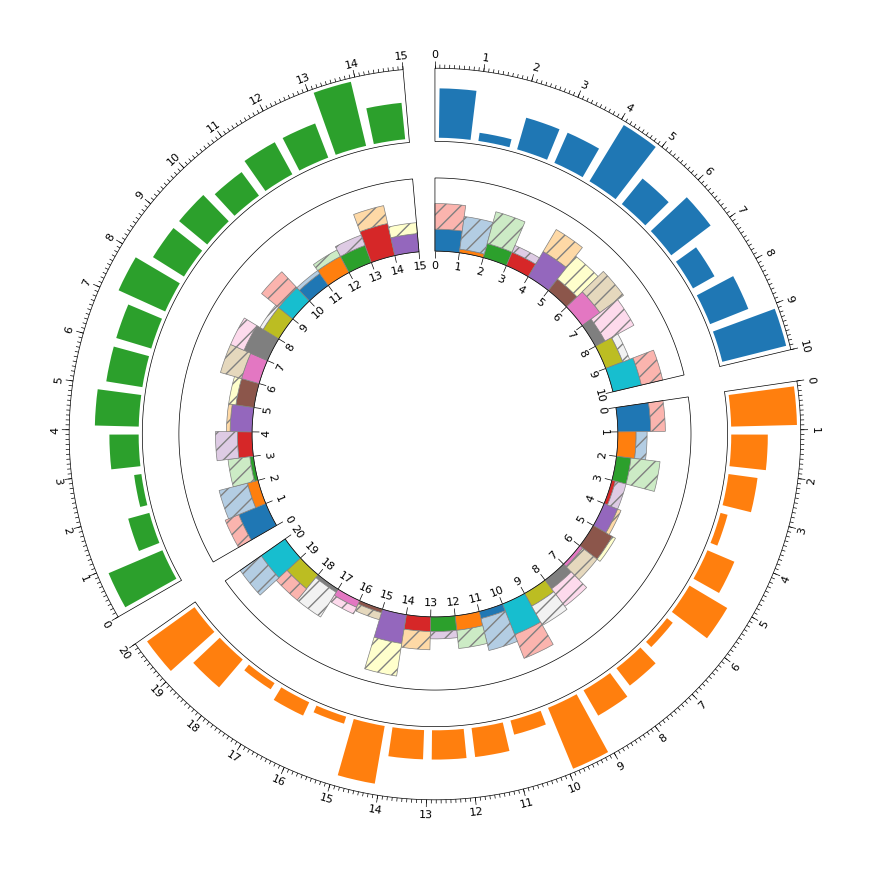

In [22]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    vmin, vmax = 1, 10
    x = np.linspace(sector.start + 0.5, sector.end - 0.5, int(sector.size))
    y = np.random.randint(vmin, vmax, len(x))
    # Plot bar (default)
    track1 = sector.add_track((80, 100), r_pad_ratio=0.1)
    track1.axis()
    track1.xticks_by_interval(1)
    track1.xticks_by_interval(0.1, tick_length=1, show_label=False)
    track1.bar(x, y)
    # Plot stacked bar with user-specified params
    track2 = sector.add_track((50, 70))
    track2.axis()
    track2.xticks_by_interval(1, outer=False)

    ColorCycler.set_cmap("tab10")
    tab10_colors = [ColorCycler() for _ in range(len(x))]
    track2.bar(x, y, width=1.0, color=tab10_colors, ec="grey", lw=0.5, vmax=vmax * 2)

    ColorCycler.set_cmap("Pastel1")
    pastel_colors = [ColorCycler() for _ in range(len(x))]
    y2 = np.random.randint(vmin, vmax, len(x))
    track2.bar(x, y2, width=1.0, bottom=y, color=pastel_colors, ec="grey", lw=0.5, hatch="//", vmax=vmax * 2)

fig = circos.plotfig()

### 3-11. fill_between

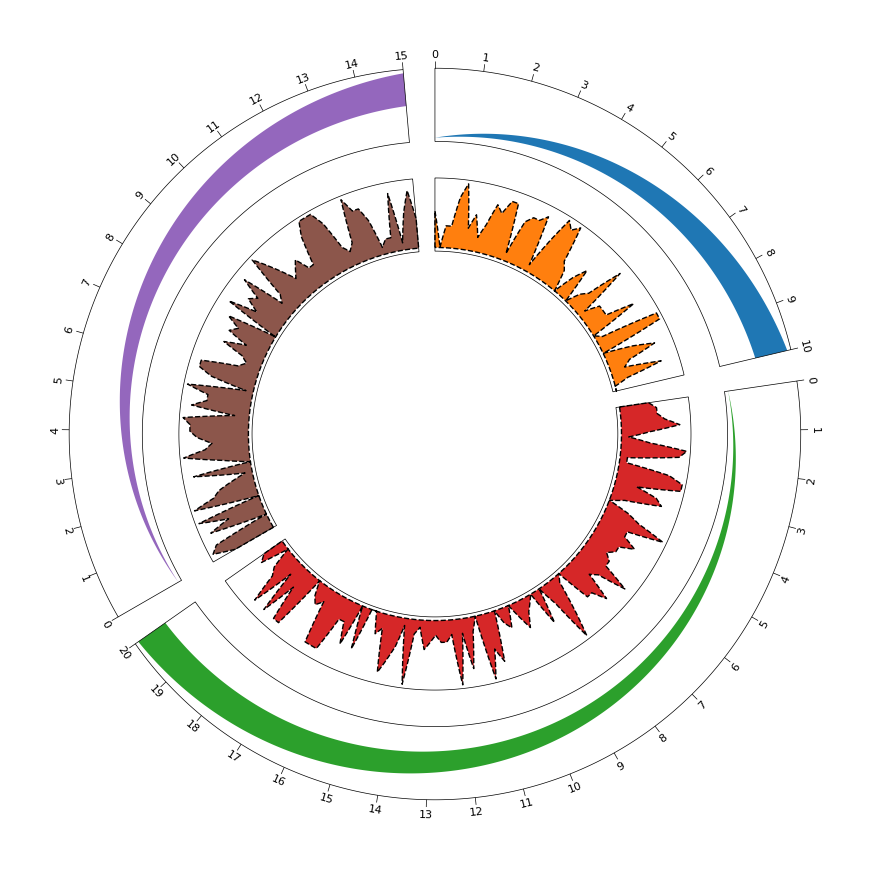

In [23]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    vmin, vmax = 0, 10
    # Plot fill_between with simple lines
    track1 = sector.add_track((80, 100), r_pad_ratio=0.1)
    track1.axis()
    track1.xticks_by_interval(1)
    track1.fill_between(x=[track1.start, track1.end], y1=[vmin, vmax], y2=[vmin, vmax / 2])
    # Plot fill_between with random points line
    track2 = sector.add_track((50, 70), r_pad_ratio=0.1)
    track2.axis()
    x = np.linspace(track2.start, track2.end, int(track2.size) * 5 + 1)
    y = np.random.randint(vmin, vmax, len(x))
    track2.fill_between(x, y, ec="black", lw=1, ls="dashed")

fig = circos.plotfig()

### 3-12. heatmap

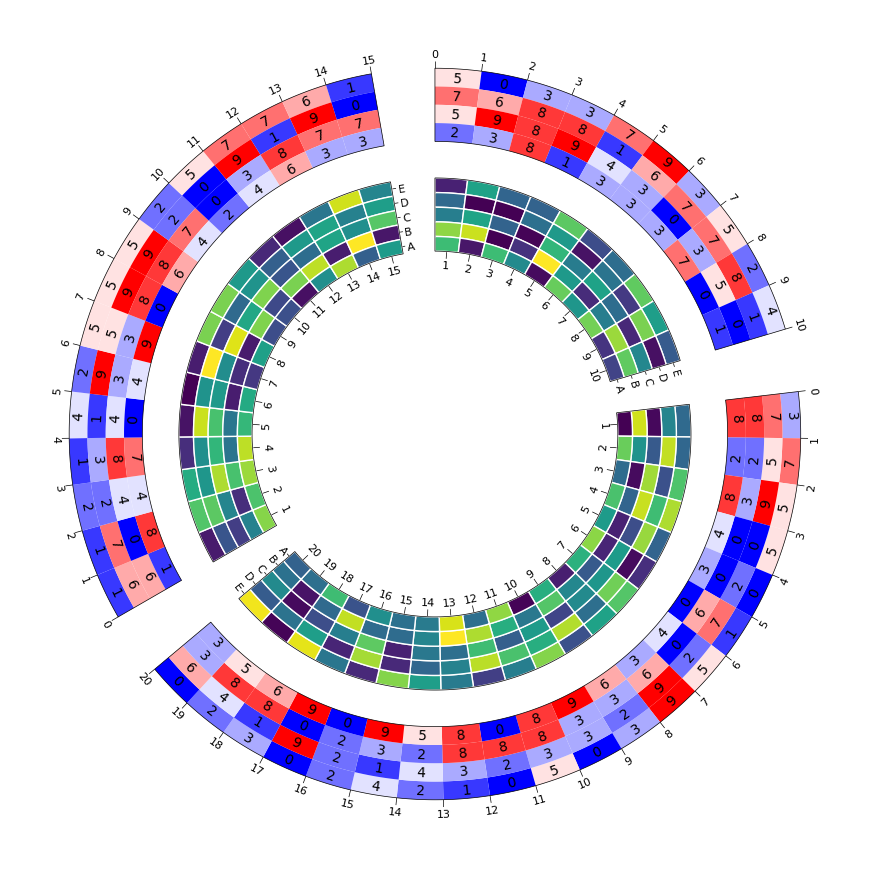

In [24]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=10)
for sector in circos.sectors:
    # Plot heatmap 
    track1 = sector.add_track((80, 100))
    track1.axis()
    track1.xticks_by_interval(1)
    data = np.random.randint(0, 10, (4, int(sector.size)))
    track1.heatmap(data, show_value=True)
    # Plot heatmap with labels
    track2 = sector.add_track((50, 70))
    track2.axis()
    x = np.linspace(1, int(track2.size), int(track2.size)) - 0.5
    xlabels = [str(int(v + 1)) for v in x]
    track2.xticks(x, xlabels, outer=False)
    track2.yticks([0.5, 1.5, 2.5, 3.5, 4.5], list("ABCDE"), vmin=0, vmax=5)
    data = np.random.randint(0, 100, (5, int(sector.size)))
    track2.heatmap(data, cmap="viridis", rect_kws=dict(ec="white", lw=1))

fig = circos.plotfig()

### 3-13. tree

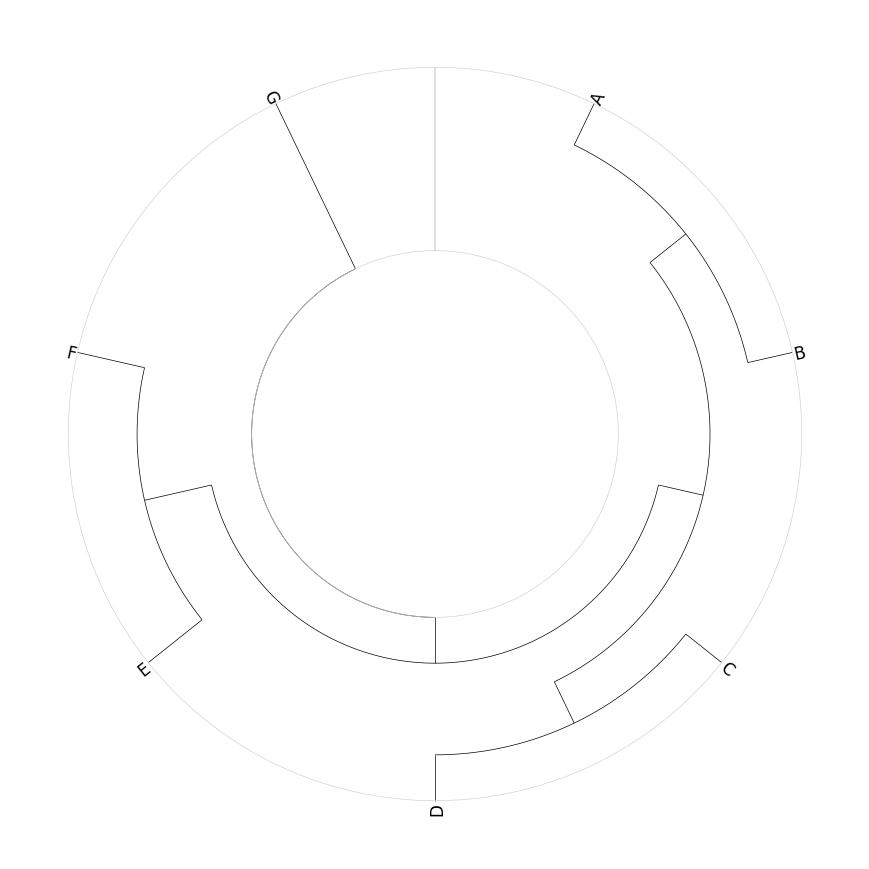

In [25]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo

# Load newick tree
tree_text = "((((A:1,B:1)100:1,(C:1,D:1)100:1)100:1,(E:2,F:2)90:1):1,G:6)100;"
tree = Phylo.read(StringIO(tree_text), "newick")
# Initialize circos sector by tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]
# Plot tree
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(tree, leaf_label_size=12)

fig = circos.plotfig()

### 3-14. genomic_features

#### 3-14-1. Genbank file

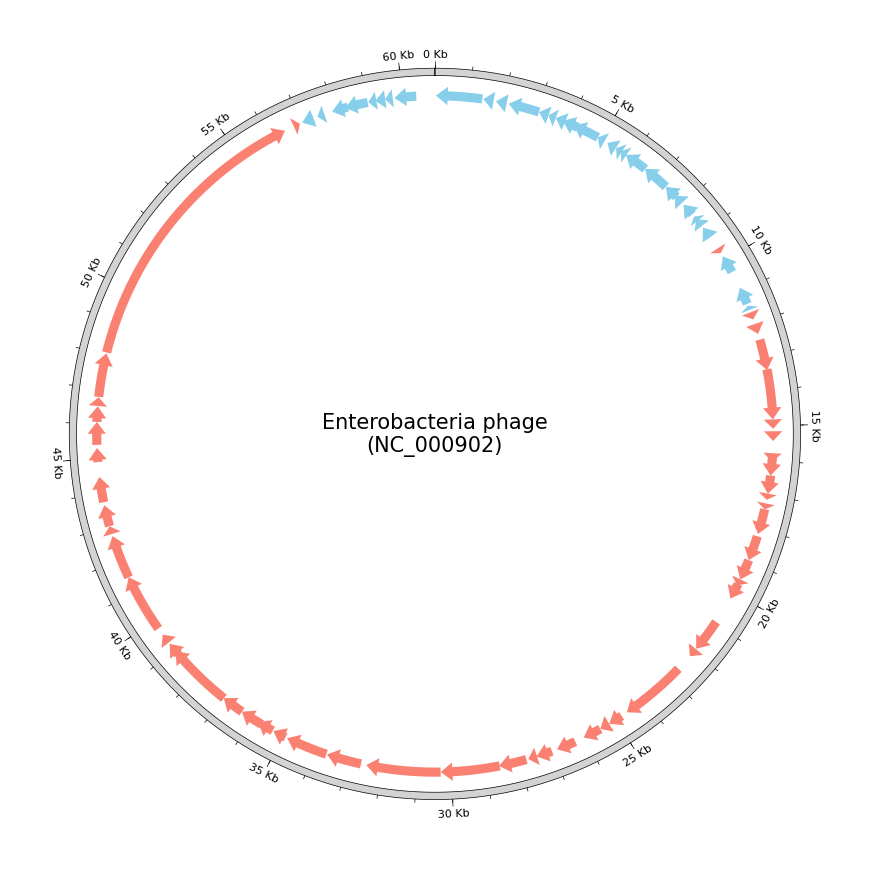

In [26]:
from pycirclize import Circos
from pycirclize.utils import load_prokaryote_example_file
from pycirclize.parser import Genbank

# Load Genbank file
gbk_file = load_prokaryote_example_file("enterobacteria_phage.gbk")
gbk = Genbank(gbk_file)
# Initialize circos sector by genome size
circos = Circos(sectors={gbk.name: gbk.range_size})
circos.text("Enterobacteria phage\n(NC_000902)", size=15)
sector = circos.sectors[0]
# Outer track
outer_track = sector.add_track((98, 100))
outer_track.axis(fc="lightgrey")
outer_track.xticks_by_interval(5000, label_formatter=lambda v: f"{v / 1000:.0f} Kb")
outer_track.xticks_by_interval(1000, tick_length=1, show_label=False)
# Plot forward & reverse CDS genomic features
cds_track = sector.add_track((90, 95))
cds_track.genomic_features(gbk.extract_features("CDS", 1), plotstyle="arrow", fc="salmon")
cds_track.genomic_features(gbk.extract_features("CDS", -1), plotstyle="arrow", fc="skyblue")

fig = circos.plotfig()

#### 3-14-2. GFF file

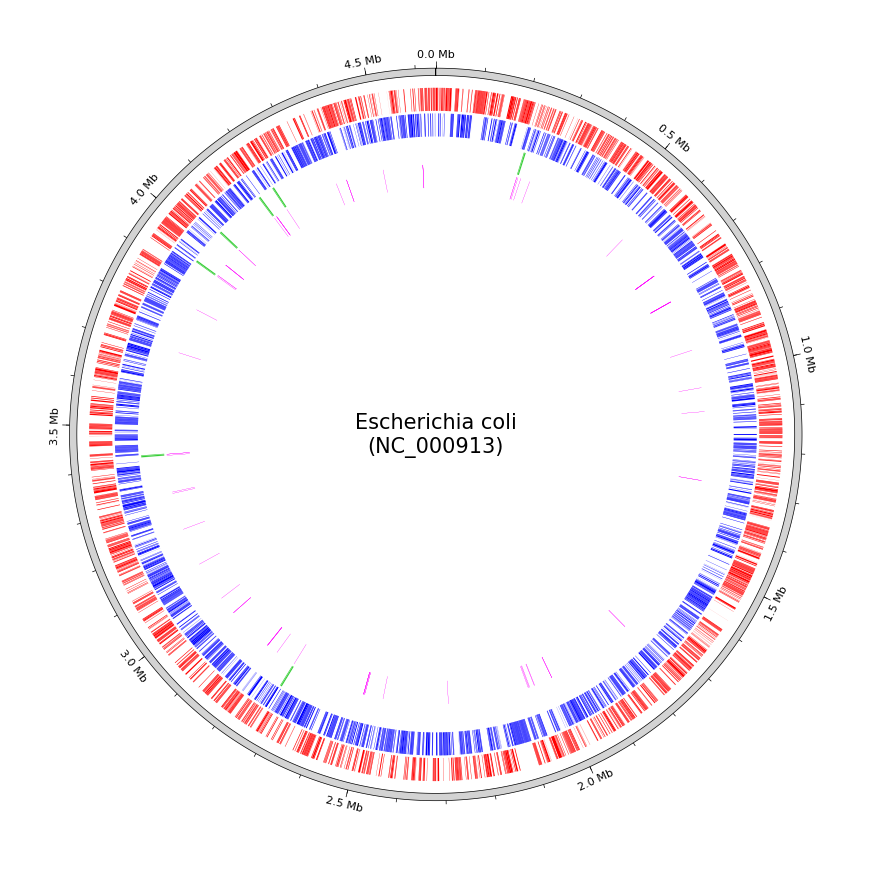

In [27]:
from pycirclize import Circos
from pycirclize.utils import load_prokaryote_example_file
from pycirclize.parser import Gff

# Load GFF file
gff_file = load_prokaryote_example_file("escherichia_coli.gff.gz")
gff = Gff(gff_file)
# Initialize circos sector by genome size
circos = Circos(sectors={gff.name: gff.range_size})
circos.text("Escherichia coli\n(NC_000913)", size=15)
sector = circos.sectors[0]
# Outer track
outer_track = sector.add_track((98, 100))
outer_track.axis(fc="lightgrey")
outer_track.xticks_by_interval(500000, label_formatter=lambda v: f"{v / 1000000:.1f} Mb")
outer_track.xticks_by_interval(100000, tick_length=1, show_label=False)
# Forward CDS genomic features
f_cds_track = sector.add_track((88, 95), r_pad_ratio=0.1)
f_cds_track.genomic_features(gff.extract_features("CDS", 1),  fc="red")
# Reverse CDS genomic features
r_cds_track = sector.add_track((81, 88), r_pad_ratio=0.1)
r_cds_track.genomic_features(gff.extract_features("CDS", -1), fc="blue")
# rRNA genomic features
rrna_track = sector.add_track((74, 81), r_pad_ratio=0.1)
rrna_track.genomic_features(gff.extract_features("rRNA"), fc="limegreen")
# tRNA genomic features
trna_track = sector.add_track((67, 74), r_pad_ratio=0.1)
trna_track.genomic_features(gff.extract_features("tRNA"), color="magenta", lw=0.1)

fig = circos.plotfig()